In [ ]:
!python -m pip install --upgrade pip

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 9.8 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 23.1.2
    Uninstalling pip-23.1.2:
      Successfully uninstalled pip-23.1.2


In [1]:
!git clone https://github.com/jparksecurity/rapidsai-csp-utils
%cd rapidsai-csp-utils
!git checkout patch-22.12
%cd ..
!python rapidsai-csp-utils/colab/env-check.py
!python rapidsai-csp-utils/colab/pip-install.py

# Install the Merlin Framework
!pip install -U git+https://github.com/NVIDIA-Merlin/models.git

Cloning into 'rapidsai-csp-utils'...
remote: Enumerating objects: 383, done.
remote: Counting objects: 100% (126/126), done.
remote: Compressing objects: 100% (79/79), done.
remote: Total 383 (delta 89), reused 48 (delta 47), pack-reused 257
Receiving objects: 100% (383/383), 106.38 KiB | 8.87 MiB/s, done.
Resolving deltas: 100% (187/187), done.
/content/rapidsai-csp-utils
error: pathspec 'patch-22.12' did not match any file(s) known to git
/content
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 944.9 kB/s eta 0:00:00
***********************************************************************
Woo! Your instance has the right kind of GPU, a Tesla T4!
We will now install RAPIDS via pip!  Please stand by, should be quick...
***********************************************************************

***********************************************************************
Woo! Your instance has the right kind of GPU, a Tesla T4!
We will now install RAPIDS cuDF, cuML, and cuGraph via pip

In [1]:
!pip install -U git+https://github.com/NVIDIA-Merlin/nvtabular.git
!pip install -U git+https://github.com/NVIDIA-Merlin/core.git
!pip install -U git+https://github.com/NVIDIA-Merlin/systems.git
!pip install -U git+https://github.com/NVIDIA-Merlin/dataloader.git
!pip install -U git+https://github.com/NVIDIA-Merlin/Transformers4Rec.git
!pip install -U xgboost lightfm implicit

  Cloning https://github.com/NVIDIA-Merlin/nvtabular.git to /tmp/pip-req-build-el2h3hn5
  Running command git clone --filter=blob:none --quiet https://github.com/NVIDIA-Merlin/nvtabular.git /tmp/pip-req-build-el2h3hn5
  Resolved https://github.com/NVIDIA-Merlin/nvtabular.git to commit 9f0ba3379333eb95fbb9222faa00ca1658a28a7f
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for nvtabular: filename=nvtabular-23.8.0+2.g9f0ba337-cp310-cp310-linux_x86_64.whl size=248838 sha256=4ac64d01e9cdbd5dfefec16a2afc62612c37a0fb27ce4291f1901d53150cb9f4
  Stored in directory: /tmp/pip-ephem-wheel-cache-hnxmtgkv/wheels/3d/58/4d/cdb4b94f0b7c6c4c9962d0f68a7cdb25f9b00e6092e4bc785b
Successfully built nvtabular
  Cloning https://github.com/NVIDIA-Merlin/core.git to /tmp/pip-req-build-39xhep36
  Running command git clone --filter=blob:none --quiet https://github.com/NVIDIA-Merlin/core.git /tmp/pip-req-build-39

In [2]:
import os

import numpy as np
import cupy as cp
import glob

import cudf
import nvtabular as nvt

from nvtabular.ops import Operator
from merlin.dag import ColumnSelector
from merlin.schema import Schema, Tags

/usr/local/lib/python3.10/dist-packages/merlin/dtypes/mappings/triton.py:53: UserWarning: Triton dtype mappings did not load successfully due to an error: No module named 'tritonclient'
  warn(f"Triton dtype mappings did not load successfully due to an error: {exc.msg}")


In [3]:
from numba import config
config.CUDA_LOW_OCCUPANCY_WARNINGS = 0

In [4]:
#session lengths max- 19
df = cudf.read_parquet('/content/drive/MyDrive/output.parquet')

In [ ]:
#session lengths max- 199
# df = cudf.read_parquet('/content/drive/MyDrive/output_ses_100.parquet')

In [5]:
print(df.head(5))

   user_id  movie_id  rating  unix_timestamp  Action  Adventure  Animation  \
0        1      3186       4       978300019       0          0          0   
1        1      1270       5       978300055       0          0          0   
2        1      1721       4       978300055       0          0          0   
3        1      1022       5       978300055       0          0          1   
4        1      2340       3       978300103       0          0          0   

   Children's  Comedy  Crime  ...  Horror  Musical  Mystery  Romance  Sci-Fi  \
0           0       0      0  ...       0        0        0        0       0   
1           0       1      0  ...       0        0        0        0       1   
2           0       0      0  ...       0        0        0        1       0   
3           1       0      0  ...       0        1        0        0       0   
4           0       0      0  ...       0        0        0        1       0   

   Thriller  War  Western  liked  Session_id  
0  

In [6]:
movie_id = ['movie_id'] >> nvt.ops.TagAsItemID()>> nvt.ops.Categorify()
user_id = ['user_id'] >> nvt.ops.TagAsUserID() >> nvt.ops.Categorify()
Action = ['Action'] >>  nvt.ops.Categorify()
Adventure = ['Adventure'] >>  nvt.ops.Categorify()
Animation = ['Animation'] >>  nvt.ops.Categorify()
Comedy = ["Comedy"] >>  nvt.ops.Categorify()
Crime = ["Crime"] >>  nvt.ops.Categorify()
Drama = ["Drama"] >>  nvt.ops.Categorify()
Fantasy = ["Fantasy"] >>  nvt.ops.Categorify()
Horror = ["Horror"] >>  nvt.ops.Categorify()
Romance = ["Romance"] >>  nvt.ops.Categorify()
Thriller = ["Thriller"] >>  nvt.ops.Categorify()

# genre = ['Action','Adventure', 'Animation', "Children's", 'Comedy', 'Crime',
#        'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical',
#        'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']


In [7]:
feature_list = ['Session_id']+ user_id + movie_id + Action + Adventure + Comedy + Crime + Drama + Fantasy + Horror + Romance + Thriller
groupby_features = feature_list >> nvt.ops.Groupby(groupby_cols=['user_id','Session_id'],
                                                   aggs={'movie_id': 'list', 'Action': list,
                                                        'Adventure': list,
                                                         'Comedy': list,
                                                         'Crime': list,
                                                         'Drama': list,
                                                         'Fantasy': list,
                                                         'Horror': list,
                                                         'Romance': list,
                                                         'Thriller': list})

In [8]:
groupby_features_list = groupby_features['movie_id_list','Action_list','Adventure_list', 'Comedy_list', 'Drama_list', 'Fantasy_list', 'Horror_list', 'Romance_list', 'Thriller_list' ]

In [9]:
SESSIONS_MAX_LENGTH = 20
MINIMUM_SESSION_LENGTH = 2

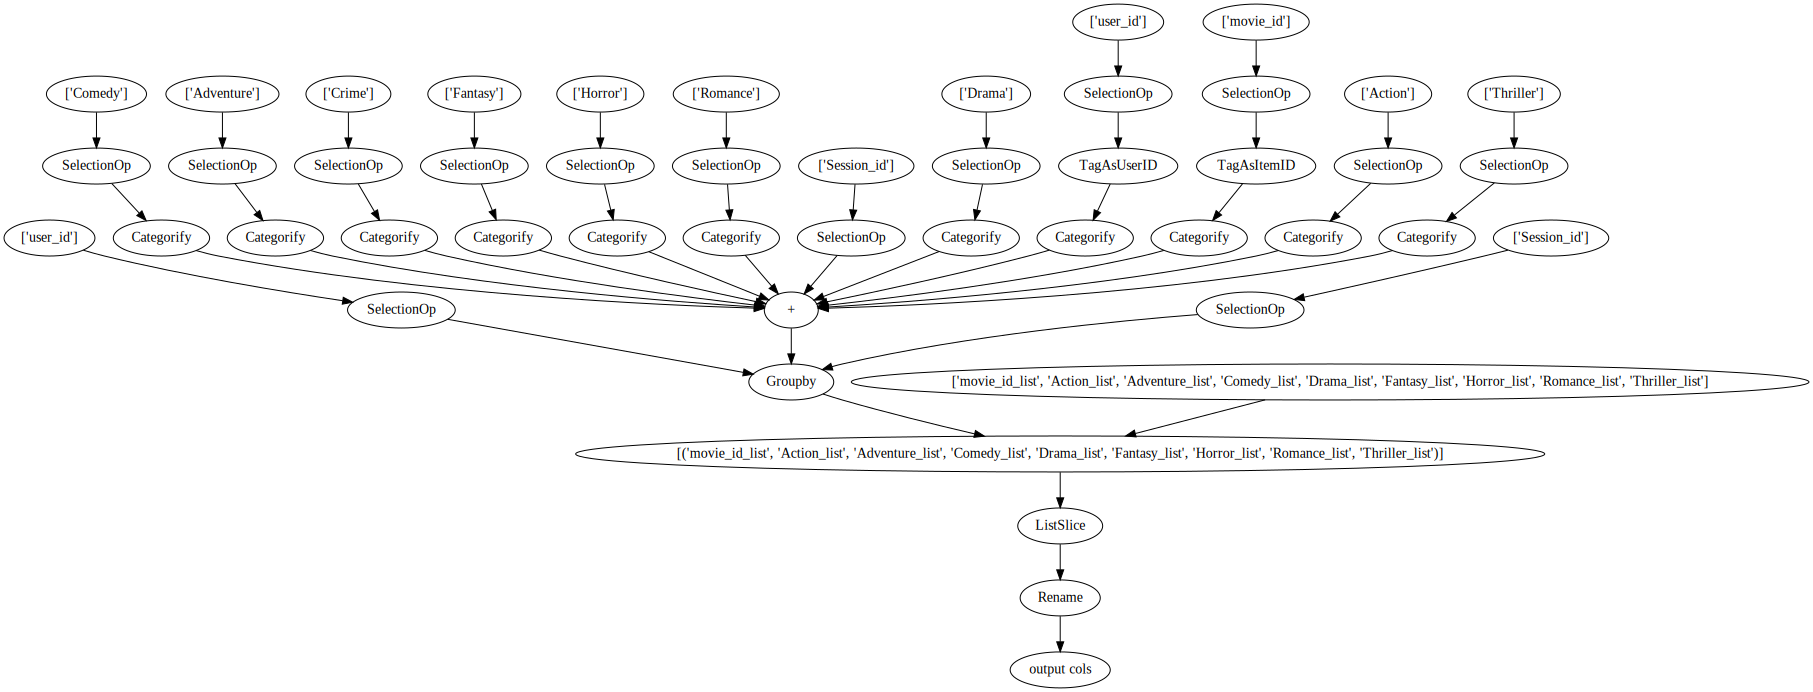

In [10]:
groupby_features_trim = groupby_features_list >> nvt.ops.ListSlice(0,SESSIONS_MAX_LENGTH, pad = True) >> nvt.ops.Rename(postfix='_seq')
groupby_features_trim.graph

In [11]:
sess_id = groupby_features['Session_id'] >> nvt.ops.AddMetadata(tags=[Tags.CATEGORICAL])
selected_features = sess_id + groupby_features_trim

In [12]:
workflow = nvt.Workflow(groupby_features_trim)

In [13]:
num_sessions = len(df['Session_id'].unique())
print(num_sessions)

80902


In [14]:
train = int(0.9 * num_sessions)
test = num_sessions- train
print(train)
print(test)

72811
8091


In [15]:
train_indices= cudf.Series(cudf.core.index.RangeIndex(0, train))
print(train_indices)

0            0
1            1
2            2
3            3
4            4
         ...  
72806    72806
72807    72807
72808    72808
72809    72809
72810    72810
Length: 72811, dtype: int64


In [16]:
train_df = df.take(train_indices)
test_df = df.drop(train_indices)
train_df = train_df[train_df['Session_id'] != 7019]

In [17]:
train_df.head()

,user_id,movie_id,rating,unix_timestamp,Action,Adventure,Animation,Children's,Comedy,Crime,...,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,liked,Session_id
0,1,3186,4,978300019,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
1,1,1270,5,978300055,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,1
2,1,1721,4,978300055,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,1
3,1,1022,5,978300055,0,0,1,1,0,0,...,0,1,0,0,0,0,0,0,1,1
4,1,2340,3,978300103,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,1


In [18]:
train_df.tail(20)

,user_id,movie_id,rating,unix_timestamp,Action,Adventure,Animation,Children's,Comedy,Crime,...,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,liked,Session_id
72790,564,1210,5,976039933,1,1,0,0,0,0,...,0,0,0,1,1,0,1,0,1,7017
72791,564,2078,4,976039933,0,0,1,1,1,0,...,0,1,0,0,0,0,0,0,1,7017
72792,564,2023,3,976039980,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,7017
72793,564,2432,3,976039980,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,7017
72794,564,1961,4,976040018,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,7017
72795,564,2529,5,976040018,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,7017
72796,564,2339,3,976040018,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,7017
72797,564,3916,5,976040258,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,7017
72798,564,3062,4,976040258,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,7017
72799,564,3217,4,976040358,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,7017


In [19]:
test_df.head()

,user_id,movie_id,rating,unix_timestamp,Action,Adventure,Animation,Children's,Comedy,Crime,...,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,liked,Session_id
72811,564,1204,5,976040575,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,1,7019
72812,564,1212,3,976040575,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,1,7019
72813,564,3250,4,976040614,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,7019
72814,564,1262,4,976040614,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,1,7019
72815,564,593,5,976040652,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,7019


In [20]:
dataset = nvt.Dataset(df)
workflow.fit_transform(dataset).to_parquet(os.path.join('/content/drive/MyDrive/movie_rec_with_features', "total_nvt"))


In [21]:
workflow.output_schema.column_names

['movie_id_list_seq',
 'Action_list_seq',
 'Adventure_list_seq',
 'Comedy_list_seq',
 'Drama_list_seq',
 'Fantasy_list_seq',
 'Horror_list_seq',
 'Romance_list_seq',
 'Thriller_list_seq']

In [22]:
dataset = nvt.Dataset(train_df)
workflow.fit_transform(dataset).to_parquet(os.path.join('/content/drive/MyDrive/movie_rec_with_features', "train_nvt"))

In [23]:
dataset = nvt.Dataset(test_df)
workflow.fit_transform(dataset).to_parquet(os.path.join('/content/drive/MyDrive/movie_rec_with_features', "test_nvt"))

In [24]:
check_train_df = cudf.read_parquet('/content/drive/MyDrive/movie_rec_with_features/train_nvt/part_0.parquet')
check_train_df.head(5)

,movie_id_list_seq,Action_list_seq,Adventure_list_seq,Comedy_list_seq,Drama_list_seq,Fantasy_list_seq,Horror_list_seq,Romance_list_seq,Thriller_list_seq
0,"[957, 21, 61, 457, 1083, 1550, 79, 99, 157, 38...","[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, ...","[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, ...","[3, 4, 3, 3, 3, 3, 3, 4, 3, 3, 0, 0, 0, 0, 0, ...","[4, 3, 4, 3, 3, 4, 4, 4, 4, 4, 0, 0, 0, 0, 0, ...","[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, ...","[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, ...","[3, 3, 4, 3, 4, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, ...","[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, ..."
1,"[540, 5, 47, 23, 98, 82, 8, 274, 1073, 275, 0,...","[3, 4, 3, 3, 4, 3, 4, 3, 3, 3, 0, 0, 0, 0, 0, ...","[3, 4, 4, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, ...","[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, ...","[3, 3, 4, 4, 3, 4, 4, 4, 3, 3, 0, 0, 0, 0, 0, ...","[3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, ...","[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, ...","[3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, ...","[3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, ..."
2,"[407, 513, 90, 186, 25, 267, 391, 80, 16, 166,...","[3, 3, 3, 3, 3, 3, 4, 3, 3, 3, 0, 0, 0, 0, 0, ...","[3, 3, 3, 3, 3, 3, 4, 3, 3, 3, 0, 0, 0, 0, 0, ...","[3, 3, 3, 4, 3, 3, 3, 4, 3, 3, 0, 0, 0, 0, 0, ...","[4, 3, 4, 3, 4, 3, 4, 3, 3, 4, 0, 0, 0, 0, 0, ...","[3, 3, 3, 3, 4, 3, 3, 4, 3, 3, 0, 0, 0, 0, 0, ...","[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, ...","[3, 3, 3, 3, 3, 4, 3, 3, 3, 3, 0, 0, 0, 0, 0, ...","[3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 0, 0, 0, 0, 0, ..."
3,"[649, 65, 734, 46, 34, 126, 524, 13, 235, 723,...","[3, 3, 3, 3, 3, 3, 3, 4, 3, 3, 0, 0, 0, 0, 0, ...","[3, 3, 3, 3, 3, 3, 3, 4, 3, 3, 0, 0, 0, 0, 0, ...","[3, 4, 3, 4, 4, 4, 3, 4, 3, 3, 0, 0, 0, 0, 0, ...","[3, 3, 4, 3, 3, 3, 3, 3, 3, 4, 0, 0, 0, 0, 0, ...","[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, ...","[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, ...","[3, 3, 3, 3, 3, 3, 3, 4, 3, 3, 0, 0, 0, 0, 0, ...","[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, ..."
4,"[1636, 20, 143, 774, 283, 91, 29, 49, 443, 629...","[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, ...","[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3, 0, 0, ...","[3, 3, 3, 3, 4, 4, 4, 4, 3, 3, 4, 3, 3, 0, 0, ...","[4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, ...","[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, ...","[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, ...","[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 0, 0, ...","[3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, ..."


In [25]:
import os
import glob

import torch
import transformers4rec.torch as tr
from transformers4rec.torch.ranking_metric import NDCGAt, RecallAt
from transformers4rec.torch.utils.examples_utils import wipe_memory

In [39]:
from merlin.schema import Schema
from merlin.io import Dataset

train = Dataset('/content/drive/MyDrive/movie_rec_with_features/train_nvt/part_0.parquet', engine="parquet")
test = Dataset('/content/drive/MyDrive/movie_rec_with_features/test_nvt/part_0.parquet', engine="parquet")
total = Dataset('/content/drive/MyDrive/movie_rec_with_features/total_nvt/part_0.parquet', engine="parquet")
schema = total.schema
# schema = schema.select_by_name(['movie_id_list_seq'])

In [52]:
#Input
sequence_length, d_model = 20, 128
# Define input module to process tabular input-features and to prepare masked inputs
inputs= tr.TabularSequenceFeatures.from_schema(
    schema,
    max_sequence_length=sequence_length,
    d_output=d_model,
    masking="mlm",
)

In [53]:
# Define XLNetConfig class and set default parameters for HF XLNet config
transformer_config = tr.XLNetConfig.build(
    d_model=d_model, n_head=4, n_layer=4, total_seq_length=sequence_length
)
# Define the model block including: inputs, masking, projection and transformer block.
body = tr.SequentialBlock(
    inputs, tr.MLPBlock([128]), tr.TransformerBlock(transformer_config, masking=inputs.masking)
)

# Define the head for to next item prediction task
head = tr.Head(
    body,
    tr.NextItemPredictionTask(weight_tying=True,
                              metrics=[NDCGAt(top_ks=[10, 20], labels_onehot=True),
                                       RecallAt(top_ks=[10, 20], labels_onehot=True)]),
)

# Get the end-to-end Model class
model = tr.Model(head)

In [54]:
from transformers4rec.config.trainer import T4RecTrainingArguments
from transformers4rec.torch import Trainer

#Set arguments for training
training_args = T4RecTrainingArguments(
            output_dir="./tmp",
            max_sequence_length=20,
            data_loader_engine='merlin',
            num_train_epochs=60,
            dataloader_drop_last=False,
            per_device_train_batch_size = 128,
            per_device_eval_batch_size = 32,
            gradient_accumulation_steps = 1,
            learning_rate=0.000666,
            report_to = [],
            logging_steps=50,
        )

In [55]:
trainer = Trainer(
    model=model,
    args=training_args,
    schema=schema,
    compute_metrics=True,
)

In [56]:
trainer.train_dataset_or_path = train

In [57]:
trainer.train()

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Step,Training Loss
50,7.867600
100,7.456100
150,7.420800
200,7.397500
250,7.363400
300,7.294400
350,7.273100
400,7.250400
450,7.219100
500,7.201600


TrainOutput(global_step=3300, training_loss=6.6928172348484845, metrics={'train_runtime': 125.7313, 'train_samples_per_second': 3359.544, 'train_steps_per_second': 26.246, 'total_flos': 0.0, 'train_loss': 6.6928172348484845})

In [58]:
trainer.eval_dataset_or_path = test

In [59]:
train_metrics = trainer.evaluate(metric_key_prefix='eval')
with open("/content/drive/MyDrive/movie_rec_transformer/results.txt", 'a') as f:
    f.write(f'XLNET with features accuracy')
    for key in sorted(train_metrics.keys()):
        f.write(" %s = %s" % (key, str(train_metrics[key])))


Hyper Parameter tuning

In [ ]:
from transformers4rec.config.trainer import T4RecTrainingArguments
from transformers4rec.torch import Trainer

In [ ]:
def get_trainer(d_model, n_head, n_layer, batch_size):
  #Input
  sequence_length, d_model = 20, d_model
  # Define input module to process tabular input-features and to prepare masked inputs
  inputs= tr.TabularSequenceFeatures.from_schema(
    schema,
    max_sequence_length=sequence_length,
    d_output=d_model,
    masking="mlm",)
  # Define XLNetConfig class and set default parameters for HF XLNet config
  transformer_config = tr.XLNetConfig.build(
    d_model=d_model, n_head=n_head, n_layer=n_layer, total_seq_length=sequence_length)
  # Define the model block including: inputs, masking, projection and transformer block.
  body = tr.SequentialBlock(
    inputs, tr.MLPBlock([d_model]), tr.TransformerBlock(transformer_config, masking=inputs.masking))

  # Define the head for to next item prediction task
  head = tr.Head(
    body,
    tr.NextItemPredictionTask(weight_tying=True,
                              metrics=[NDCGAt(top_ks=[10, 20], labels_onehot=True),
                                       RecallAt(top_ks=[10, 20], labels_onehot=True)]),)
  # Get the end-to-end Model class
  model = tr.Model(head)
  #Set arguments for training
  training_args = T4RecTrainingArguments(
              output_dir="./tmp",
              max_sequence_length=20,
              data_loader_engine='merlin',
              num_train_epochs=100,
              dataloader_drop_last=False,
              per_device_train_batch_size = batch_size,
              per_device_eval_batch_size = 32,
              gradient_accumulation_steps = 1,
              learning_rate=0.000666,
              report_to = [],
              logging_steps=50,
          )
  trainer = Trainer(
    model=model,
    args=training_args,
    schema=schema,
    compute_metrics=True,)
  trainer.train_dataset_or_path = train
  trainer.train()
  trainer.eval_dataset_or_path = test
  train_metrics = trainer.evaluate(metric_key_prefix='eval')
  ndgc_val = train_metrics["eval_/next-item/ndcg_at_20"]
  with open("/content/drive/MyDrive/movie_rec_transformer/results_epoc_100.txt", 'a') as f:
    f.write(f'XLNET accuracy: for the d_model: {d_model}, n_head:{n_head}, n_layer:{n_layer}, batch: {batch_size}')
    f.write('\n')
    for key, value in  model.compute_metrics().items():
        f.write('%s:%s\n' % (key, value.item()))
  return ndgc_val





In [ ]:
print(get_trainer(64, 4, 2, 32))

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Step,Training Loss


KeyboardInterrupt: ignored

In [ ]:
# Parameter Selection:
d_models = [64,128]
# d_models =[128]
n_heads=[2, 4] # d_models % n_heads should always be 0
n_heads = [4]
n_layers=[2, 4]
batch_sizes = [32, 64, 128]
ndgc_values = []
max = 0
for d_model in d_models:
  for n_head in n_heads:
    for n_layer in n_layers:
      for batch_size in batch_sizes:
          ndgc_val = get_trainer(d_model, n_head, n_layer, batch_size)
          if ndgc_val > max: max = ndgc_val
          ndgc_values.append((d_model, n_head, n_layers, ))

print(ndgc_val)
print(ndgc_values)




/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Step,Training Loss
50,7.767900
100,6.885000
150,6.669000
200,6.596300
250,6.568800
300,6.571200


/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Step,Training Loss
50,7.712900
100,6.884700
150,6.663500
200,6.627400


/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Step,Training Loss
50,7.641100
100,6.958100


/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Step,Training Loss
50,7.719800
100,6.851800
150,6.652100
200,6.570100
250,6.568900
300,6.559900


/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Step,Training Loss
50,7.706700
100,6.857800
150,6.676900
200,6.602400


/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Step,Training Loss
50,7.614100
100,6.933100


/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Step,Training Loss
50,7.503800
100,6.679700
150,6.525000
200,6.511600
250,6.489400
300,6.504300


/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Step,Training Loss
50,7.465700
100,6.614300
150,6.507000
200,6.512000


/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Step,Training Loss
50,7.378500
100,6.546500


/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Step,Training Loss
50,7.477300
100,6.622000
150,6.534900
200,6.505100
250,6.517700
300,6.460000


/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Step,Training Loss
50,7.460100
100,6.634400
150,6.517700
200,6.516700


/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Step,Training Loss
50,7.317100
100,6.543200


0.02690926380455494
[(64, 4, [2, 4]), (64, 4, [2, 4]), (64, 4, [2, 4]), (64, 4, [2, 4]), (64, 4, [2, 4]), (64, 4, [2, 4]), (128, 4, [2, 4]), (128, 4, [2, 4]), (128, 4, [2, 4]), (128, 4, [2, 4]), (128, 4, [2, 4]), (128, 4, [2, 4])]
